
# Análise dos Dados do Airbnb - Hong Kong

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Hong Kong, e ver quais insights podem ser extraídos a partir de dados brutos.**

**INCLUIR ALGUNS DADOS TURÍSTICOS RELEVANTES SOBRE HONG KONG**

> Indented block



DADOS GEOGÁFICOS, HISTÓRICOS, POPULAÇÃO, TAMANHO, TURISTAS QUE RECEBE, ETC

> Indented block



## Obtenção dos Dados


In [ ]:
#Importar os pacotes necessarios
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
#Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/china/hk/hong-kong/2020-03-17/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id: número de identificação do imóvel
* name: nome da propriedade anunciada
* host_id: número de identificação do proprietário (anfitrião) 
* host_name: Nome do anfitrião
* neighbourhood_group: esta coluna não contém nenhum valor válido
* neighbourhood: bairro em que a propriedade está localizada
* latitude: coordenada da latitude da propriedade
* longitude: coordenada da longitude da propriedade
* room_type: tipo de propriedade oferecida (quarto privado, quarto compartilhado ou apartamento/casa inteira) 
* price: valor da diária da propriedade (em HK$ - dólar de Hong Kong)
* minimum_nights: quantidade mínima de noites para reserva
* number_of_reviews: número de reviews que a propriedade possui
* last_review: data do último review
reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
availability_365: número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, é importante verificar a forma básica do *dataset*, por meio da visualização das primeiras cinco entradas.

In [ ]:
#Mostrar as 5 primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,69074,Beautiful oasis of plants & art @ best location,160139,Amy,NaN,Central & Western,22.28352,114.15018,Entire home/apt,1398,3,133,2019-10-05,1.20,1,174
1,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28407,114.15570,Entire home/apt,847,2,269,2020-01-25,2.53,12,360
2,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,NaN,Central & Western,22.28868,114.14494,Entire home/apt,1048,2,303,2020-02-21,2.87,12,342
3,133390,"Soho, Hong Kong 1 bedroom flat",654642,Robin,NaN,Central & Western,22.28343,114.15539,Entire home/apt,932,2,27,2015-06-30,0.25,1,44
4,163664,Soho off Hollywood Road P4,304876,Brend,NaN,Central & Western,22.28651,114.14874,Entire home/apt,691,2,221,2020-01-31,2.12,12,356


In [ ]:
#Mostrar os bairros onde se localizam as propriedades
df['neighbourhood'].unique()

array(['Central & Western', 'Yau Tsim Mong', 'Wan Chai', 'Yuen Long',
       'Southern', 'Eastern', 'Islands', 'Kowloon City', 'Kwai Tsing',
       'North', 'Sha Tin', 'Sham Shui Po', 'Tuen Mun', 'Sai Kung',
       'Wong Tai Sin', 'Tai Po', 'Tsuen Wan', 'Kwun Tong'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

Quantidade de entradas que o conjunto de dados possui, bem como os tipos de dados de cada coluna.

OBS: Este *dataset* é uma versão "resumida" do Airbnb. Na mesma página existe uma versão mais completa, com 106 variáveis (`listings.csv.gz`).

In [ ]:
#Identificar o volume de dados do dataset
print(f'Entradas (número de linhas): {df.shape[0]}')
print(f'Variáveis (número de colunas): {df.shape[1]}\n')

#Verificar os tipos de dados de cada coluna do dataset
print('Os tipos de dados em cada coluna são:\n')
display(df.dtypes)

Entradas (número de linhas): 11773
Variáveis (número de colunas): 16

Os tipos de dados em cada coluna são:



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em mais de um terço das linhas.
* As variáveis `name` têm aproximadamente 0,068% dos valores nulos.

In [ ]:
#Rrdenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)


neighbourhood_group               100.000000
reviews_per_month                  35.454005
last_review                        35.454005
name                                0.067952
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

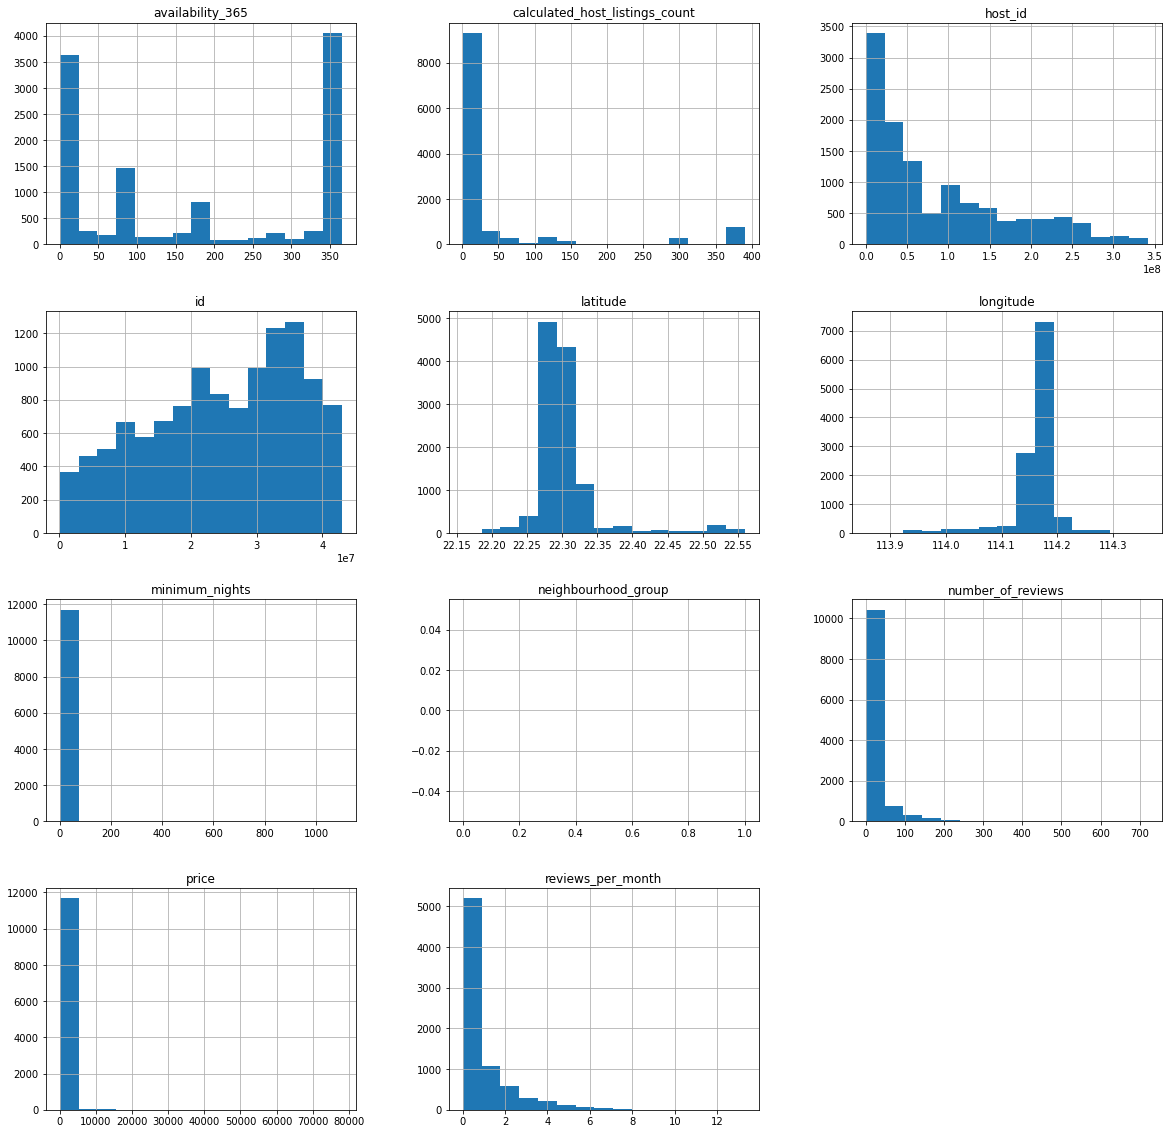

In [ ]:
#Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,20));

### **Q4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers* (por exemplo, nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
#Analisar o resumo estatístico das variáveis numéricas de interesse
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11773.000000,11773.000000,11773.000000,7599.000000,11773.000000,11773.000000
mean,748.366771,9.392763,18.284125,0.963437,44.445171,177.156205
std,1932.688382,27.745797,41.218675,1.304382,101.286743,155.328153
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,303.000000,1.000000,0.000000,0.140000,1.000000,0.000000
50%,489.000000,2.000000,2.000000,0.420000,4.000000,158.000000
75%,800.000000,6.000000,15.000000,1.220000,18.000000,364.000000
max,77998.000000,1100.000000,720.000000,13.290000,390.000000,365.000000


Com base no resumo estatístico, a existência de outliers é confirmada:

* A variável `price` possui 75% dos seus valores abaixo de HK\$ 800, porém seu valor máximo mostra que há propriedades com valor de HK\$ 77980.

* O valor máximo de `minimum_nights` é de 1100 dias, o que corresponde há mais de três anos.

#### Boxplot para minimum_nights


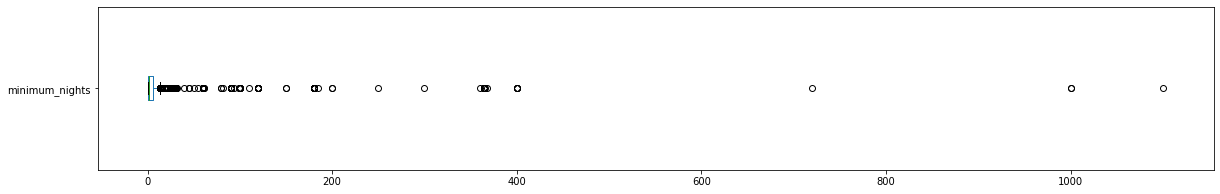

In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(20, 3))
plt.show()


O gráfico Boxplot mostra claramente a existência de outliers.

In [ ]:
#Verificar a quantidade de valores acima de 30 dias para minimum_nights
print(f'A variável minimum_nights apresenta {len(df[df.minimum_nights > 30])} entradas acima de 30 dias.')
print(f'Isto corresponde a {len(df[df.minimum_nights > 30]) / df.shape[0]*100:.2f}% das entradas.')

A variável minimum_nights apresenta 302 entradas acima de 30 dias.
Isto corresponde a 2.57% das entradas.


#### Boxplot para price

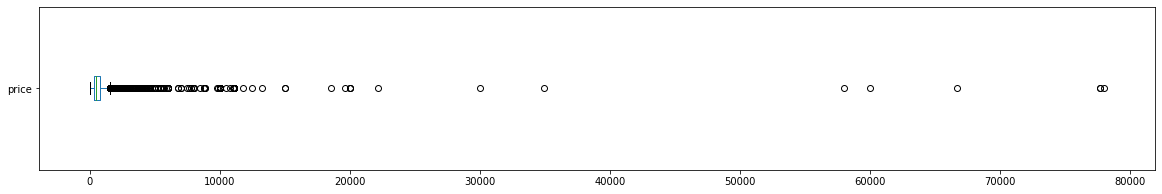


price: valores acima de 1500
709 entradas
6.0223%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(20, 3),)
plt.show()


In [ ]:
#Verificar a quantidade de valores acima de 1500 para price
print(f'A variável price apresenta {len(df[df.price > 2000])} entradas acima de HK$2000')
print(f'Isso corresponde a {((len(df[df.price > 2000]) / df.shape[0])*100):.2f}% das entradas')


A variável price apresenta 427 entradas acima de HK$2000
Isso corresponde a 3.63% das entradas


#### Histogramas sem *outliers*

Uma vez que *outliers* foram identificados nas variáveis `price` e `minimum_nights`, é importante limpar o *DataFrame* e plotar novamente os histogramas.

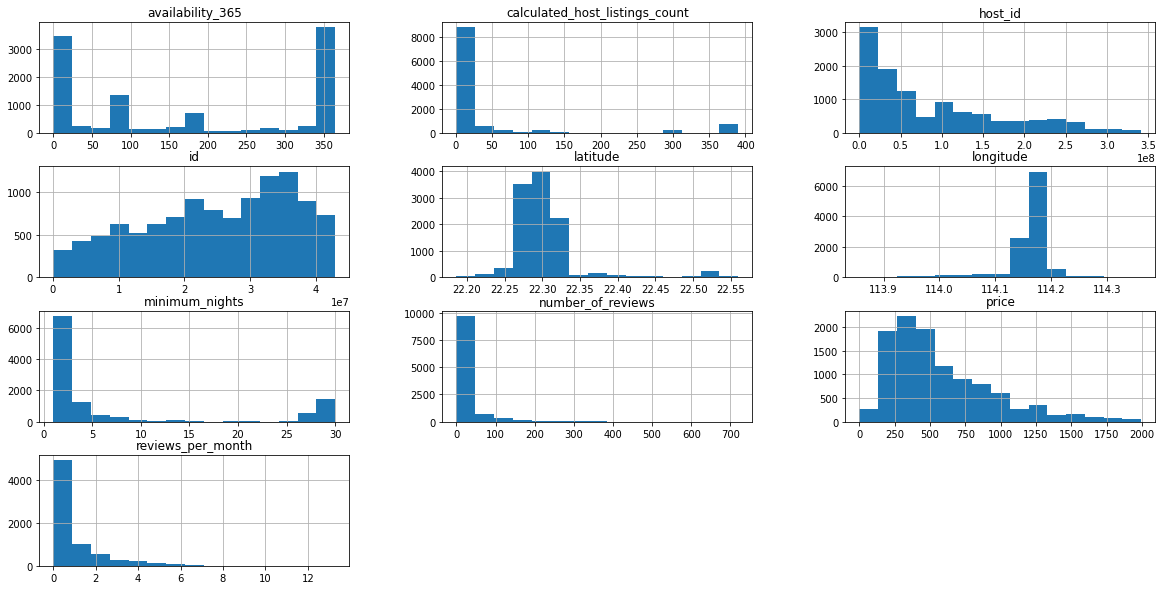

In [ ]:
#Remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,10));

### **Q5. Existe correlação entre as variáveis?**

A correlação entra as variáveis pode ser medida pela matriz de correlação e um heatmap pode ser contruído a partir dessa matriz, usando a biblioteca seaborn.

OBS: É importante lembrar que correlação não indica causalidade!!!

In [ ]:
#Criar uma matriz de correlação
correlação = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(correlação)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.228874,0.043611,-0.001916,-0.306196,-0.180090
minimum_nights,-0.228874,1.000000,-0.184435,-0.127716,0.694866,0.396353
number_of_reviews,0.043611,-0.184435,1.000000,0.802996,-0.149840,0.011555
reviews_per_month,-0.001916,-0.127716,0.802996,1.000000,-0.062500,0.064608
calculated_host_listings_count,-0.306196,0.694866,-0.149840,-0.062500,1.000000,0.435297
availability_365,-0.180090,0.396353,0.011555,0.064608,0.435297,1.000000


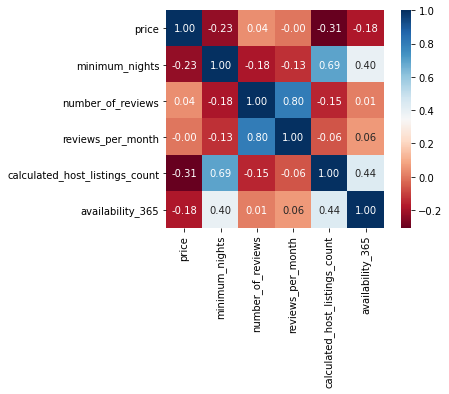

In [ ]:
#Plotar um heatmap a partir das correlações
sns.heatmap(correlação, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q6. Qual quantidade de propriedades disponíveis em Hong Kong?**

A coluna da variável `room_type` indica o tipo de propriedade anunciada, que pode variar entre apartamentos/casas inteiras, quarto inteiro ou mesmo quarto compartilhado com outras pessoas.
O Airbnb em Hong Kong ainda inclui quartos de hotel, o que não acontece em outras cidades (por exemplo, Rio de Janeiro). 


In [ ]:
#Mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts() 


Private room       5331
Entire home/apt    4897
Shared room         595
Hotel room          232
Name: room_type, dtype: int64

In [ ]:
#Mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts()/ df_clean.shape[0])*100

Private room       48.222524
Entire home/apt    44.296698
Shared room         5.382180
Hotel room          2.098598
Name: room_type, dtype: float64

### **Q7. Quais as localidades mais caras em Hong Kong?**



In [ ]:
#Verificar preços por bairros, na média (top 10)
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Southern             802.525000
Kwai Tsing           777.756757
Islands              717.933036
Central & Western    699.900251
Tsuen Wan            647.560000
Kwun Tong            587.339623
Wong Tai Sin         573.708333
Sai Kung             571.118881
Wan Chai             569.150025
Eastern              534.367454
Name: price, dtype: float64

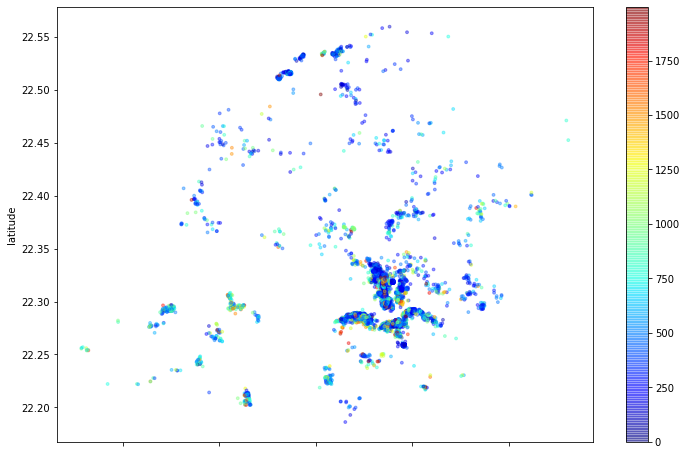

In [ ]:
#Plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb relativos à cidade de Hong Kong.
Nesta análise percebe-se que existem *outliers* em algumas das variáveis. 

Também pode-se notar que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.